In [1]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture 
from pandas import DataFrame
from matplotlib import pyplot as plotter
import random
import numpy
from typing import List
from sklearn.datasets import make_blobs

In [2]:
def generate_uniform_dataset(n_data_points=100,
                             feature_range: int = 1.0,
                             random_state: int = None):
    if random_state is None:
        random_state = int(random.random() * 100)
    return numpy.random.RandomState(random_state).uniform(0,
                                                          feature_range,
                                                          size=(n_data_points, 2))


def generate_blobbed_dataset(n_data_points=100,
                             feature_range: int = 1.0,
                             n_blobs: int = 3,
                             blob_std: float = None,
                             blob_centers: List[List[float]] = None,
                             size_blobs: List[int] = None,
                             random_state: int = None):
    if random_state is None:
        random_state = int(random.random() * 100)
    if size_blobs is None:
        size_blobs = [int(random.random() * 10) for x in range(n_blobs)]
    if blob_std is None:
        blob_std = random.random() * 0.2 * feature_range
    if blob_centers is None:
        blob_centers = [[random.random() * feature_range,
                         random.random() * feature_range] for x in range(n_blobs)]
    blob_samples = []
    for blob_counter in range(len(size_blobs)):
        blob_samples.append(n_data_points * size_blobs[blob_counter] // sum(size_blobs))
    return make_blobs(n_samples=blob_samples,
                      cluster_std=blob_std,
                      centers=blob_centers,
                      random_state=random_state)[0]


In [3]:
# Generate Data

data_points = 200

In [4]:
uniform_dataset = DataFrame(data = generate_uniform_dataset(data_points), 
                            columns=['X', 'Y'])
blobbed_dataset = DataFrame(data=generate_blobbed_dataset(n_data_points=data_points,
                                                          n_blobs=4,
                                                          blob_std=0.1,
                                                          blob_centers=[[0.7, 0.2],
                                                                        [0.2, 0.1],
                                                                        [0.3, 0.8],
                                                                        [0.9, 0.9]],
                                                          size_blobs=[2,
                                                                      3,
                                                                      5,
                                                                      7]),
                            columns=['X', 'Y'])

In [5]:
print(uniform_dataset)

            X         Y
0    0.310830  0.818987
1    0.334753  0.193714
2    0.110313  0.962310
3    0.865047  0.852412
4    0.079511  0.760739
..        ...       ...
195  0.807417  0.024836
196  0.351400  0.905099
197  0.934349  0.134541
198  0.289519  0.133319
199  0.313013  0.319173

[200 rows x 2 columns]


In [6]:
number_of_clusters = 2
data_in = blobbed_dataset

In [7]:
model_kmeans = KMeans(number_of_clusters)
model_kmeans.fit(data_in)
clust_labels = model_kmeans.predict(data_in)
cent = model_kmeans.cluster_centers_
kmeans = DataFrame(clust_labels)
data_in.insert((data_in.shape[1]),'kmeans',kmeans)

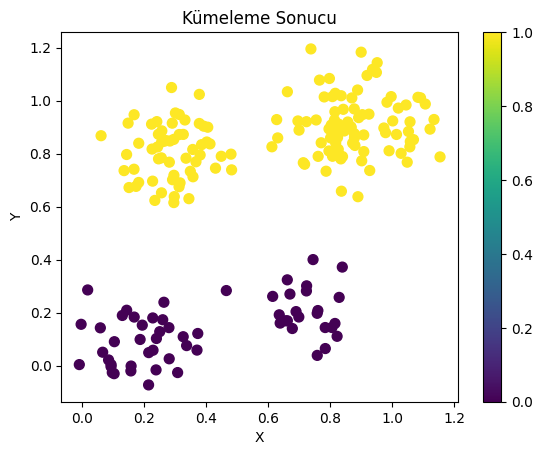

In [8]:
fig = plotter.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data_in['X'],data_in['Y'],
                     c=kmeans[0],s=50)
ax.set_title('Kümeleme Sonucu')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plotter.colorbar(scatter)

In [9]:
number_of_clusters_agg = 4
data_in_agg = blobbed_dataset

In [10]:
model_agg = AgglomerativeClustering(n_clusters=number_of_clusters_agg, metric = 'euclidean', linkage = 'ward')
clust_labels_agg = model_agg.fit_predict(data_in_agg)

agglomerative = DataFrame(clust_labels_agg)
data_in_agg.insert((data_in_agg.shape[1]),'agglomerative',agglomerative)

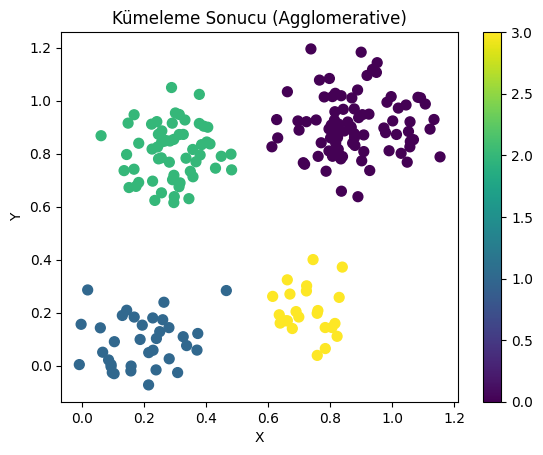

In [11]:
fig = plotter.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data_in_agg['X'],data_in_agg['Y'],
                     c=agglomerative[0],s=50)
ax.set_title('Kümeleme Sonucu (Agglomerative)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plotter.colorbar(scatter)

In [12]:
number_of_clusters_gmm = 3
data_in_gmm = blobbed_dataset

In [13]:
model_gmm = GaussianMixture(n_components=number_of_clusters_gmm, init_params='kmeans')
model_gmm.fit(data_in_gmm)
clust_labels_gmm = model_gmm.predict(data_in_gmm)

gmm = DataFrame(clust_labels_gmm)
data_in_gmm.insert((data_in_gmm.shape[1]),'gmm',gmm)

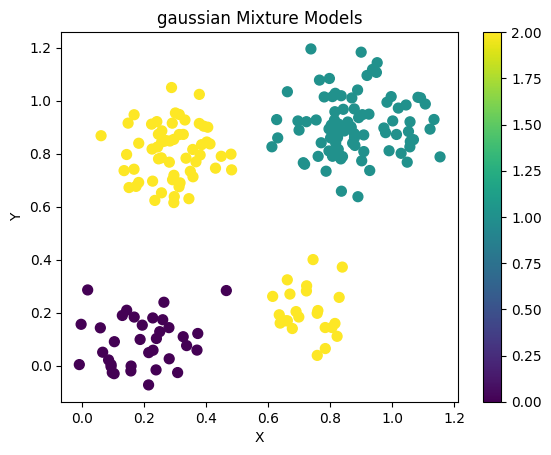

In [14]:
fig = plotter.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data_in_gmm['X'],
                     data_in_gmm['Y'],
                     c=gmm[0],s=50)
ax.set_title('gaussian Mixture Models')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plotter.colorbar(scatter)

Further -> https://scikit-learn.org/stable/modules/clustering.html#clustering 